### Analyses of output files from the pipeline optimus v6.0.0+
#### Aim of this part of analysis is to normalize the data

#### Load necessary libraries and useful functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore") 

#### Data Loading

In [4]:
input_h5ad = "../scAtlas/tmp/10k_pbmc_v3_out_filtered_cellbenderDefault_lowQcell_scDblFinderSinglet_CellCycle.h5ad"
adata = sc.read_h5ad(input_h5ad)

In [5]:
display(adata)

AnnData object with n_obs × n_vars = 10214 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'scDblFinder_score', 'scDblFinder_class', 'S_score', 'G2M_score', 'phase'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'barcode_indices_for_latents', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_tes

###### check barcode and gene names

In [6]:
display(adata.var_names)
display(adata.obs_names)

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'AL627309.6', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       'pRNA-11', 'RNA5-8S5', 'pRNA-12', 'RNA5-8SN2', 'AC007325.3',
       'AC007325.1', 'AC007325.4', 'AC007325.2', 'U6-36', 'U1-15'],
      dtype='object', name='gene_name', length=58347)

Index(['CAGAGCCTCTTCGATT', 'TACATTCTCCGTAGTA', 'ATCACGAAGGGACACT',
       'ATCTTCATCCCGAATA', 'TGTTACTTCTACAGGT', 'CCGGTAGTCACGACTA',
       'TTCGGTCCAGTTGTCA', 'ATCCACCAGTAGGAAG', 'TGTGCGGCATTCCTAT',
       'ACTATCTCATAACGGG',
       ...
       'CTTTCGGAGATCGCTT', 'CCCTCTCCACAGCTTA', 'CCACAAAAGCGTCTCG',
       'TTCTGTACAGCAGTTT', 'CACCGTTCAATCCTAG', 'CCTAAGACAGCGAACA',
       'CTCCTTTGTACAGTTC', 'CCTACGTAGCACCTGC', 'GAGGGATAGTAAACGT',
       'TATTGGGGTCATACCA'],
      dtype='object', name='barcode', length=10214)

#### Normalization

Shifted logarithm

In [8]:
adata.layers["log1p_norm"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=None, layer="log1p_norm", inplace=True)
sc.pp.log1p(adata, layer="log1p_norm")

#### Write output to h5ad

In [9]:
PATH_TO_OUTPUT = "../scAtlas/tmp/10k_pbmc_v3_out_normalize.h5ad"
adata.write_h5ad(PATH_TO_OUTPUT)

#### Normalization evaluation

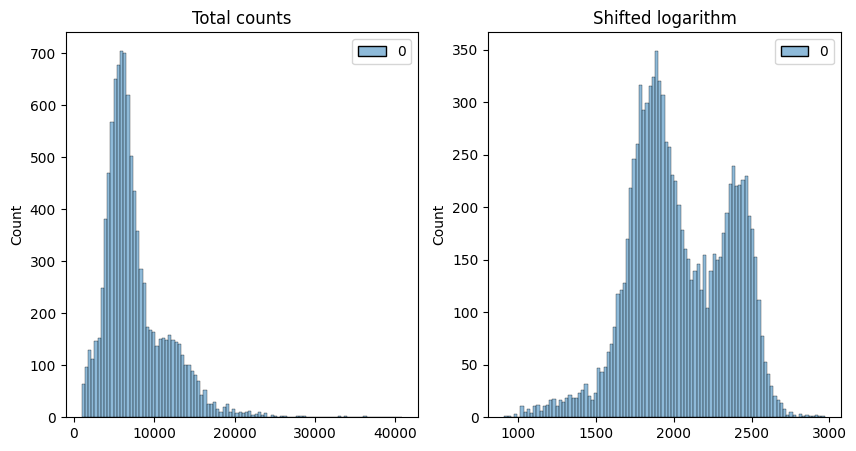

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
p1 = sns.histplot(adata.X.sum(1), bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [11]:
seed = 22

Normalizated counts

In [12]:
# sc.tl.pca doesn't work with layers
adata_norm = adata.copy()
adata_norm.X = adata.layers["log1p_norm"]
sc.tl.pca(adata_norm, svd_solver="arpack", random_state=seed)

PC1: 12.244437327110878%
PC2: 3.009863424198403%
PC3: 1.984229496246866%
PC4: 1.4597508211719916%
PC5: 0.6984837328602392%
PC6: 0.5429728975995527%
PC7: 0.4601907059662985%
PC8: 0.37522898397914367%
PC9: 0.31652206258022725%
PC10: 0.2535980535740044%
PC11: 0.21443549034405618%
PC12: 0.18461988137277713%
PC13: 0.1467955125554464%
PC14: 0.14377307534376194%
PC15: 0.1203931159973608%
PC16: 0.11369304376149482%
PC17: 0.1083975716757816%
PC18: 0.09847866000832733%
PC19: 0.09098591158543663%
PC20: 0.08954768887104678%
PC21: 0.08716145368394791%
PC22: 0.08520400013881153%
PC23: 0.0774672266877027%
PC24: 0.07093302412448639%
PC25: 0.06938438191246821%
PC26: 0.06848457057517136%
PC27: 0.06437761512946105%
PC28: 0.06377120022684346%
PC29: 0.06086047074927782%
PC30: 0.059558241004383373%
PC31: 0.059176040661690486%
PC32: 0.05807871427002406%
PC33: 0.0577614873529325%
PC34: 0.05614453292690342%
PC35: 0.05520492430417041%
PC36: 0.05466472301472923%
PC37: 0.05352659313590212%
PC38: 0.053108830792942

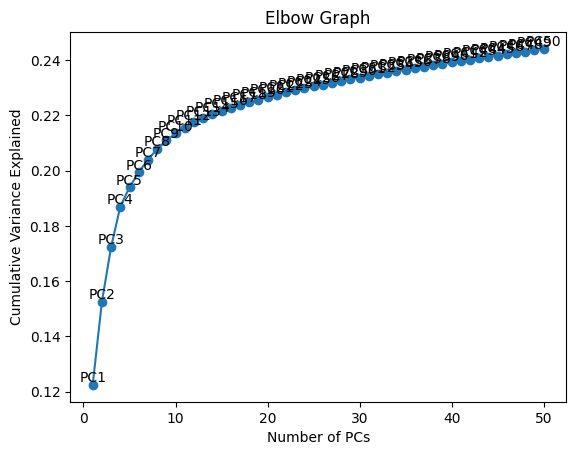

In [13]:
# Access the percentage of explained variance for each component
pca_variance_ratio = adata_norm.uns['pca']['variance_ratio']
# Print the percentage of explained variance for each component
for i, variance in enumerate(pca_variance_ratio):
    print(f"PC{i+1}: {variance * 100}%")

# Calculate the cumulative variance
cumulative_variance = pca_variance_ratio.cumsum()
# Print the cumulative variance
print("Cumulative Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance * 100}%")

# Plot the cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Explained')
plt.title('Elbow Graph')

# Add PC number to the graph
for i, variance in enumerate(cumulative_variance):
    plt.text(i+1, variance, f"PC{i+1}", ha='center', va='bottom')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


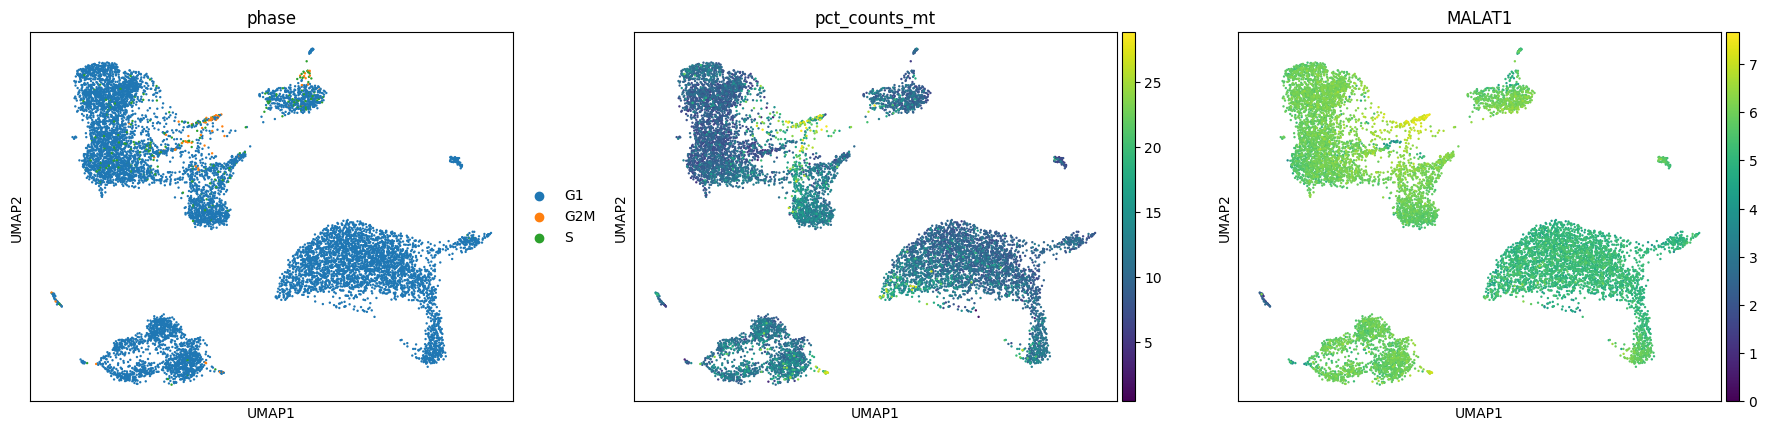

In [14]:
sc.pp.neighbors(adata_norm, n_neighbors=15, use_rep="X_pca",random_state=seed)
sc.tl.umap(adata_norm, random_state=seed)
sc.pl.umap(adata_norm ,color=["phase", "pct_counts_mt", "MALAT1"])

Raw counts

In [15]:
sc.tl.pca(adata, svd_solver="arpack", random_state=seed)

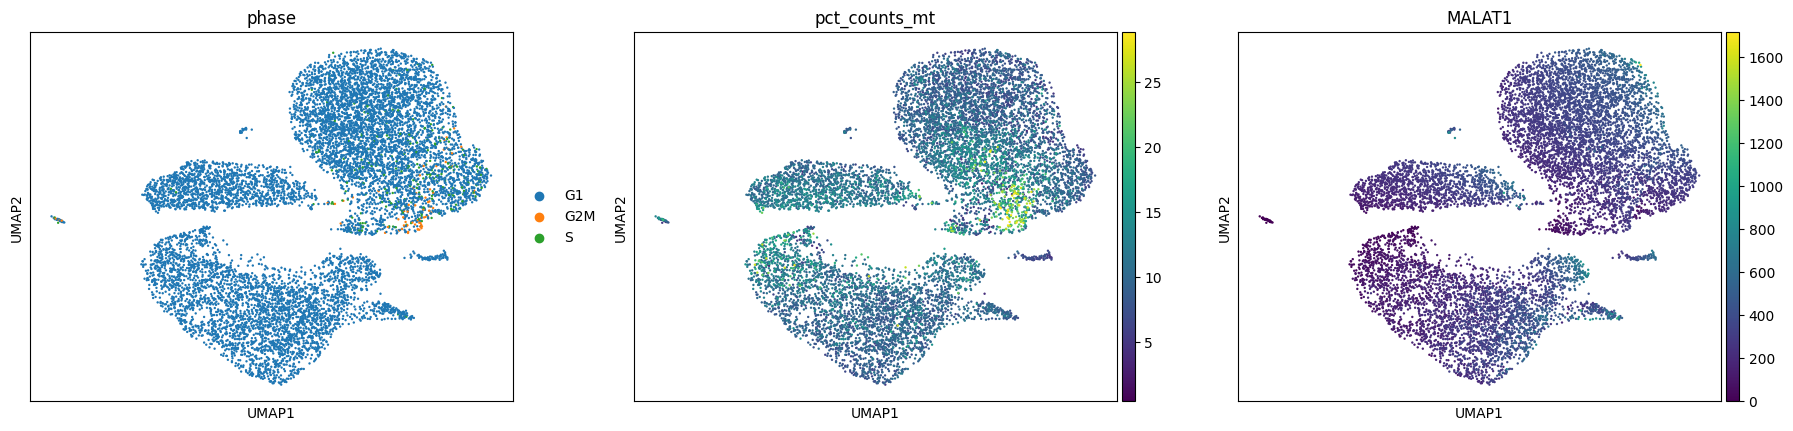

In [16]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X_pca", random_state=seed)
sc.tl.umap(adata, random_state=seed)
sc.pl.umap(adata ,color=["phase", "pct_counts_mt", "MALAT1"])

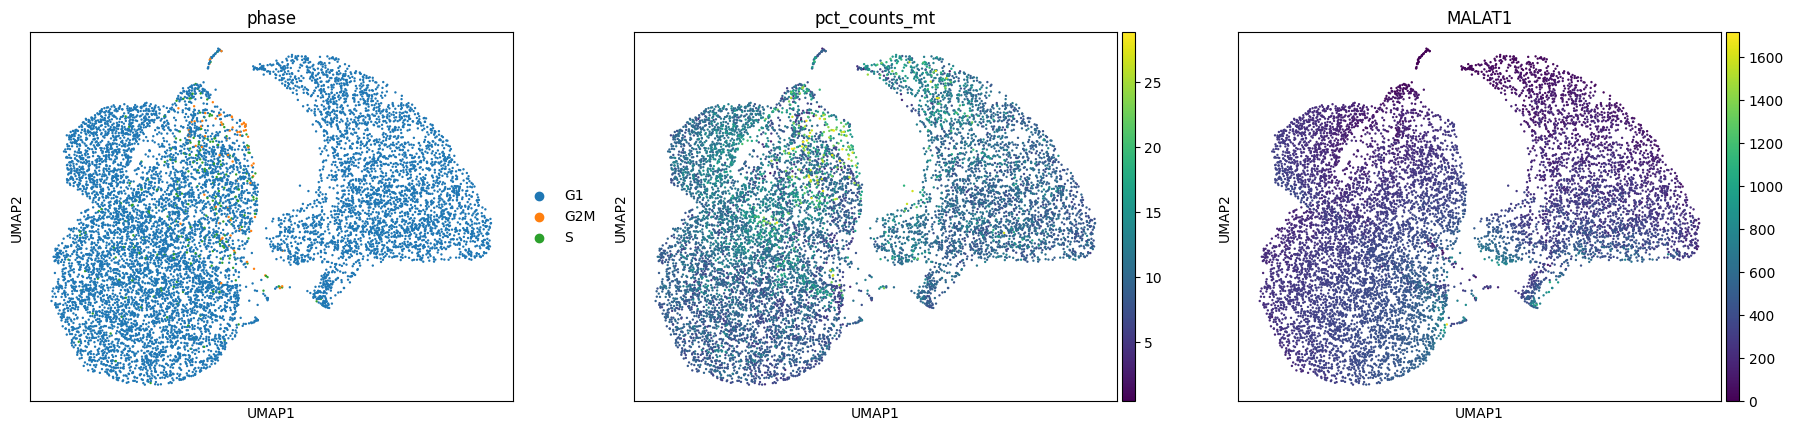

In [17]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10, random_state=seed)
sc.tl.umap(adata, random_state=seed)
sc.pl.umap(adata ,color=["phase", "pct_counts_mt", "MALAT1"])